In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import sklearn 

from sklearn.linear_model import LinearRegression



#### 01. Load Dataset

In [9]:
df_oecd_bli = pd.read_csv("E:\\workSpace_Dataset\\Hands_On_MachineLearning\\lifesat\\oecd_bli_2015.csv", thousands=",")
df_gdp_capita = pd.read_csv("E:\\workSpace_Dataset\\Hands_On_MachineLearning\\lifesat\\gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [10]:
df_oecd_bli = df_oecd_bli[df_oecd_bli["INEQUALITY"] == "TOT"]
df_oecd_bli = df_oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
df_oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [11]:
df_oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [12]:
df_gdp_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
df_gdp_capita.set_index("Country", inplace=True)
df_gdp_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [14]:
df_full_country_stats = pd.merge(left=df_oecd_bli, right=df_gdp_capita, left_index=True, right_index=True)
df_full_country_stats.sort_values(by="GDP per capita", inplace=True)
df_full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [15]:
df_full_country_stats[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [17]:
remove_indecies = [0, 1, 6, 8, 33, 34, 35]
keep_indecies = list(set(range(36)) - set(remove_indecies))

In [19]:
df_sample_data = df_full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indecies]
df_missing_data = df_full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[remove_indecies]

In [20]:
df_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


In [21]:
df_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Brazil to Luxembourg
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     7 non-null      float64
 1   Life satisfaction  7 non-null      float64
dtypes: float64(2)
memory usage: 168.0+ bytes


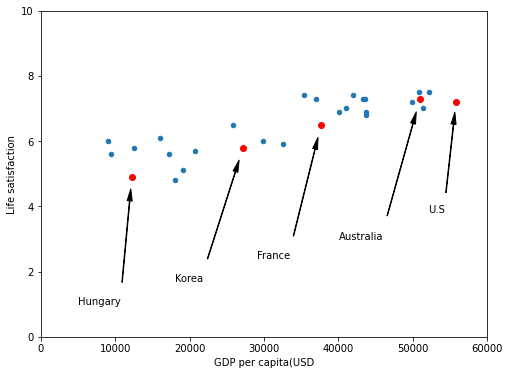

In [24]:
df_sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 6))
plt.axis([0, 60000, 0, 10])
position_txt = {
    "Hungary" :(5000, 1),
    "Korea" : (18000, 1.7), 
    "France" : (29000, 2.4), 
    "Australia" : (40000, 3.0), 
    "United States":(52000, 3.8),
}

for country, pos_txt in position_txt.items():
    # print(country, pos_txt)
    pos_data_x, pos_data_y = df_sample_data.loc[country]
    #print(" country : {0} x: {1} y :{2}".format(country, pos_data_x, pos_data_y))
    country = "U.S" if country == "United States" else country 
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_txt, arrowprops=dict(facecolor="black", width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita(USD")
plt.show()

In [26]:
position_txt
df_sample_data.loc[list(position_txt.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


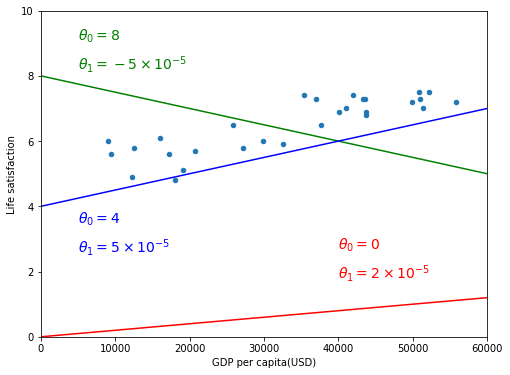

In [29]:
df_sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 6))
plt.xlabel("GDP per capita(USD)")
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()


In [40]:
lin1 = LinearRegression()
Xsample = np.c_[df_sample_data["GDP per capita"]]
ysample = np.c_[df_sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

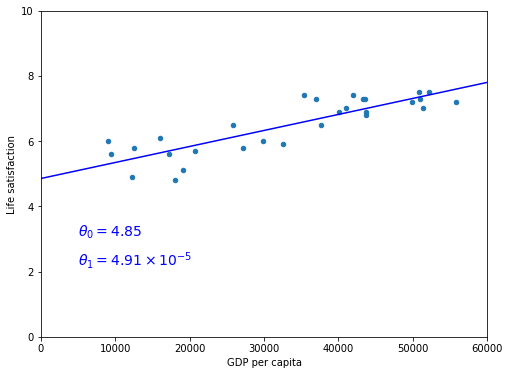

In [41]:
df_sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(8, 6))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [51]:
np_cyprus_gdp_per_capita = df_gdp_capita.loc["Cyprus"]["GDP per capita"]
print(np_cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[np_cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

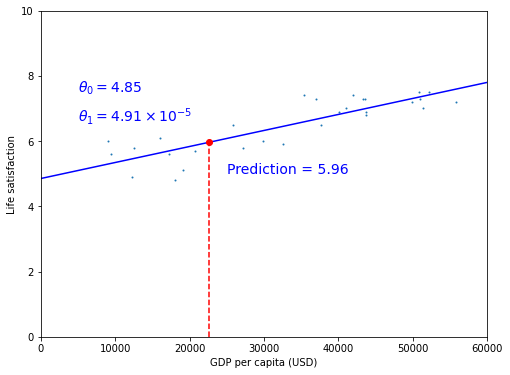

In [53]:
df_sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,6), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([np_cyprus_gdp_per_capita, np_cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(np_cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

In [54]:
df_sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [55]:
(5.1 + 5.7 + 6.5) / 3

5.766666666666667